# MACHINE LEARNING - CASO SEMESTRAL- COUNTER STRIKE

## PARTE 1 - BUSINESS UNDERSTANDING 

Convert the table into an image for display.

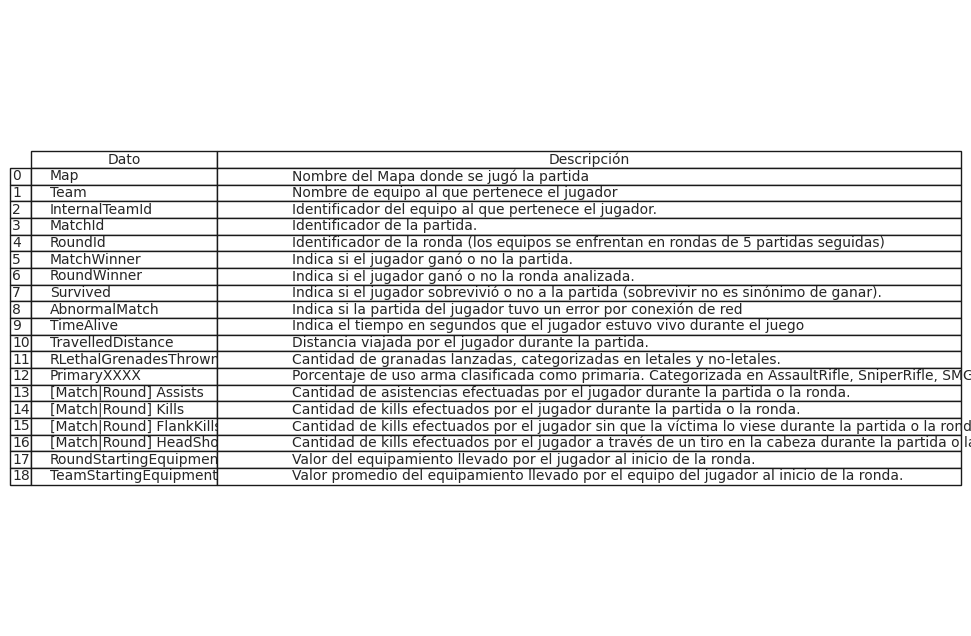

In [157]:
from pandas.plotting import table
import matplotlib.pyplot as plt

# Create DataFrame for the given table
data_map = {
    'Dato': [
        'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId', 'MatchWinner', 
        'RoundWinner', 'Survived', 'AbnormalMatch', 'TimeAlive', 'TravelledDistance', 
        'RLethalGrenadesThrown/RNonLethalGrenadesThrown', 'PrimaryXXXX', 
        '[Match|Round] Assists', '[Match|Round] Kills', '[Match|Round] FlankKills', 
        '[Match|Round] HeadShots', 'RoundStartingEquipmentValue', 
        'TeamStartingEquipmentValue'
    ],
    'Descripción': [
        'Nombre del Mapa donde se jugó la partida', 
        'Nombre de equipo al que pertenece el jugador', 
        'Identificador del equipo al que pertenece el jugador.', 
        'Identificador de la partida.', 
        'Identificador de la ronda (los equipos se enfrentan en rondas de 5 partidas seguidas)', 
        'Indica si el jugador ganó o no la partida.', 
        'Indica si el jugador ganó o no la ronda analizada.',
        'Indica si el jugador sobrevivió o no a la partida (sobrevivir no es sinónimo de ganar).', 
        'Indica si la partida del jugador tuvo un error por conexión de red', 
        'Indica el tiempo en segundos que el jugador estuvo vivo durante el juego', 
        'Distancia viajada por el jugador durante la partida.', 
        'Cantidad de granadas lanzadas, categorizadas en letales y no-letales.', 
        'Porcentaje de uso arma clasificada como primaria. Categorizada en AssaultRifle, SniperRifle, SMG, Heavy y Pistol.', 
        'Cantidad de asistencias efectuadas por el jugador durante la partida o la ronda.', 
        'Cantidad de kills efectuados por el jugador durante la partida o la ronda.', 
        'Cantidad de kills efectuados por el jugador sin que la víctima lo viese durante la partida o la ronda.', 
        'Cantidad de kills efectuados por el jugador a través de un tiro en la cabeza durante la partida o la ronda.', 
        'Valor del equipamiento llevado por el jugador al inicio de la ronda.', 
        'Valor promedio del equipamiento llevado por el equipo del jugador al inicio de la ronda.'
    ]
}

table_df = pd.DataFrame(data_map)

# Create a matplotlib figure
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')  # Remove axes

# Add table to the figure
tab = table(ax, table_df, loc='center', cellLoc='left', colWidths=[0.2, 0.8])
tab.auto_set_font_size(False)
tab.set_fontsize(10)

# Save table as an image
plt.savefig('table_output.png', dpi=300, bbox_inches='tight')
plt.show()

In [15]:
# CARGA DE LIBRERIAS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import seaborn as sns
from scipy import stats
from scipy.stats import norm

In [51]:
!pip install deepnote==0.2.3


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [112]:
# Leer el archivo CSV directamente sin usar deepnote
# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo
try:
    df = pd.read_csv('/work/EV1_ML_CRISPDM/Anexo ET_demo_round_traces_2022.csv', sep=';')
    print("Archivo cargado con éxito!")
    display(df.head())  # Muestra las primeras filas del DataFrame
except FileNotFoundError:
    print("Archivo no encontrado. Por favor, verifica la ruta y el nombre del archivo.")
except Exception as e:
    print(f"Error al cargar el archivo: {str(e)}")

Archivo cargado con éxito!
/tmp/ipykernel_96/3232052953.py:4: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/work/EV1_ML_CRISPDM/Anexo ET_demo_round_traces_2022.csv', sep=';')


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [115]:
df.head()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,750,4400,0,0,0,0
1,601,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,800,4400,0,0,0,0
2,602,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,1000,4400,0,0,0,0
3,603,de_inferno,Terrorist,1,4,1,False,True,False,False,...,0,0,0,0,850,4400,0,0,0,0
4,604,de_inferno,Terrorist,1,4,1,False,True,True,False,...,0,0,0,0,1000,4400,0,0,0,0


In [118]:
df.tail()

,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
79152,123775,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,5600,27100,4,0,2,2
79153,123776,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,1,0,1,0,5500,27100,8,5,1,3
79154,123777,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,5,0,2,3
79155,123778,de_mirage,CounterTerrorist,2,511,5,False,False,False,False,...,0,0,0,0,4950,27100,1,0,1,0
79156,123779,de_mirage,CounterTerrorist,2,511,5,False,False,True,False,...,4,0,2,0,6100,27100,5,1,1,2


In [121]:
print ('Los datos tienen {0} filas y {1} columnas'.format(df.shape[0],df.shape[1]))

Los datos tienen 79157 filas y 30 columnas


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79157 entries, 0 to 79156
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   79157 non-null  int64  
 1   Map                          79157 non-null  object 
 2   Team                         79155 non-null  object 
 3   InternalTeamId               79157 non-null  int64  
 4   MatchId                      79157 non-null  int64  
 5   RoundId                      79157 non-null  int64  
 6   RoundWinner                  79157 non-null  object 
 7   MatchWinner                  79156 non-null  object 
 8   Survived                     79157 non-null  bool   
 9   AbnormalMatch                79157 non-null  bool   
 10  TimeAlive                    79157 non-null  object 
 11  TravelledDistance            79157 non-null  object 
 12  RLethalGrenadesThrown        79157 non-null  int64  
 13  RNonLethalGrenad

In [130]:
#CHEQUEAMOS SI HAY DATOS FALTANTES
df.columns[df.isnull().any()]

Index(['Team', 'MatchWinner'], dtype='object')

In [133]:
#sumar los valores nulos para saber cuantos hay
df[['Team', 'MatchWinner']].isnull().sum()
for column in ['Team', 'MatchWinner']:
  null_percentage = (df[column].isnull().sum() / len(df)) * 100
  print(f"La columna '{column}' tiene un {null_percentage:.4f}% de valores nulos.")

La columna 'Team' tiene un 0.0025% de valores nulos.
La columna 'MatchWinner' tiene un 0.0013% de valores nulos.


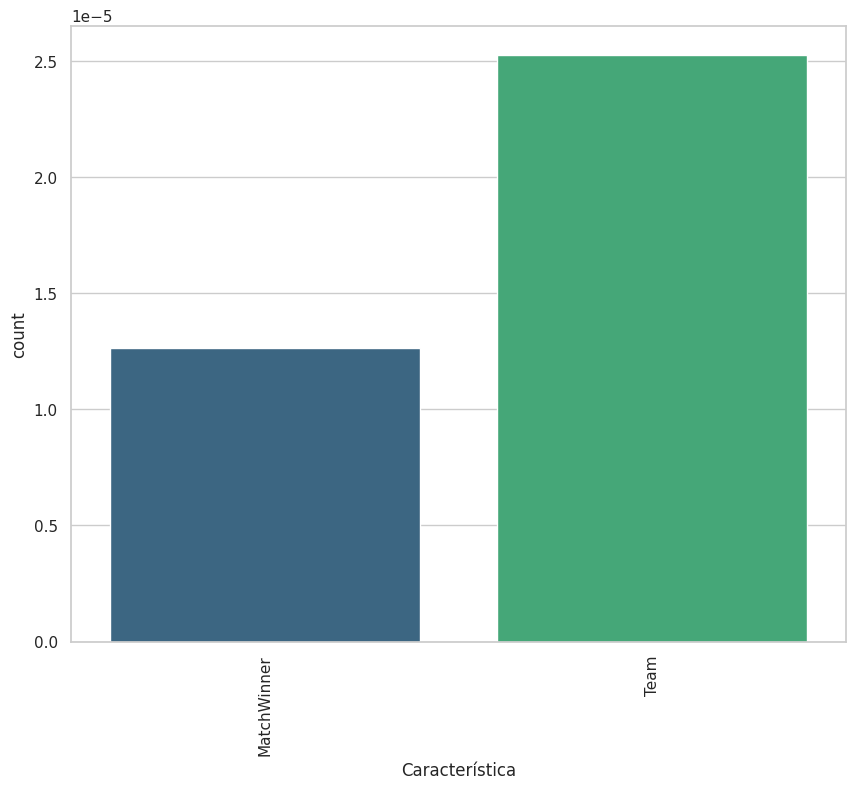

In [142]:
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Nombre']
miss['Característica'] = miss.index
#
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x='Característica', y='count', hue='Característica', palette='viridis', legend=False, data=miss)
plt.xticks(rotation = 90)
plt.show()

Contexto: Dataset de counter strike, incluye datos de equipos, mapas, jugadores, desempeño. Proporciona una visión completa de las partidas.

Problema: Se busca comprender los factores que determinan el éxito de un equipo. Implica analizar la influencia de las diferentes variables que se brindan por medio del dataset.

Público objetivo: Jugadores que puedan estar interesados en mejorar su desempeño, equipos profesionales, entrenadores y casas de apuesta.

OBJETIVOS DEL PROYECTO
CLASIFICACION: PREDECIR EL GANADOR DE UNA PARTIDA
Descripción: Desarrollar un modelo de clasificación que, utilizando las variables disponibles al inicio de la partida (mapa, equipo, equipamiento inicial, etc.), prediga qué equipo ganará la partida.
Métricas: Map, Team, RoundStartingEquipmentValue, TeamStartingEquipmentValue

REGRESIÓN: PREDECIR LA DISTANCIA RECORRIDA POR UN JUGADOR
Descripción: Desarrollar un modelo que prediga la distancia que recorrerá un jugador en una partida, basándose en variables como el mapa, el rol del jugador en el equipo y el tiempo que permanece vivo (TimeAlive).
Métricas: TimeAlive, Map, RoundStartingEquipmentValue, PrimaryXXXX  zapayooo prueebaaa xdd

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=525986a2-5580-47ad-a745-d4ac9d94edab' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>